In [2]:
# !pip install wordcloud
# !pip install fileupload
# !pip install ipywidgets
# !jupyter nbextension install --py --user fileupload
# !jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys
import re
import unicodedata
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set(style = 'whitegrid')

In [ ]:
def remove_url(str):
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    return str
    
def remove_digit(str):
    str = re.sub(r'[^a-z ]*([.0-9])*\d', ' ', str)
    return str 

def remove_non_ascii(str):
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return str

def remove_twitter_char(str):  
    # mention
    str = re.sub(r'(?:@[\w_]+)', ' ', str)
    # hashtag
    str = re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", " ", str)
    # RT/cc
    str = re.sub('RT', ' ', str)

    return str

def remove_punctuation(str):
    str = re.sub(r'[^\s\w]', ' ', str)
    return str

def remove_multi_space(str):
    str = re.sub('[\s]+', ' ', str)
    return str

def casefolding(str):  
    str = str.lower()   
    return ' '.join(str.split())

def remove_repeated_character(str):
    str = re.sub(r'(.)\1{2,}', r'\1', str)
    return str

# def normalize_slang_word(str):
#     text_list = str.split(' ')
#     slang_words_raw = pd.read_csv('data/slang_word_list.csv', sep="," , header=None)
#     slang_word_dict = {}

#     for item in slang_words_raw.values:
#         slang_word_dict[item[0]] = item[1]

#         for index in range(len(text_list)):
#             if text_list[index] in slang_word_dict.keys():
#                 text_list[index] = slang_word_dict[text_list[index]]

#     return ' '.join(text_list)


def normalize_slang_word(str):
    alay_dict = pd.read_csv('data/slang_word_list.csv', encoding='latin-1', header=None)
    alay_dict = alay_dict.rename(columns={0: 'original', 1: 'replacement'})
    alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in str.split(' ')])

# def remove_stopword(str):
#     id_stopword_dict = pd.read_csv('data/stopwordbahasa.csv', header=None)
#     id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})
#     str = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in str.split(' ')])
#     str = re.sub('  +', ' ', str)
#     str = str.strip()
#     return str

def remove_laugh(str):
    str = re.sub(r"\b(?:(h|a|e)*(?:(ha|he|hue))+h?|(?:l+o+)+l+)|(?:(w|k)*(?:wk)+(w?|k?))\b", ' ', str)
    
    return str

def remove_unused_char(str):
    tmp = ""    
    if len(str) < 3:
        tmp
    else:
        tmp = str
        
    return tmp

In [ ]:
def preprocessing(str):
    str = remove_url(str)
    str = remove_twitter_char(str)
    str = remove_digit(str)
    str = remove_non_ascii(str)
    str = remove_punctuation(str)
    str = remove_laugh(str)
    str = remove_multi_space(str) 
    str = remove_repeated_character(str)    
    str = casefolding(str)
    str = normalize_slang_word(str)
    # str = remove_stopword(str)
    str = remove_unused_char(str)
    
    return str

In [30]:
data = pd.read_csv('train_preprocess1.csv')
sentence = data['sentence']
print(sentence)

0        warung ini dimiliki oleh pengusaha pabrik tahu...
1        mohon ulama lurus dan k mmbri hujjah partai ap...
2        lokasi strategis di jalan sumatra bandung temp...
3        betapa bahagia nya diri ini saat unboxing pake...
4        aduh jadi mahasiswa jangan sombong dong kasih ...
                               ...                        
10992                                         tidak kecewa
10993    enak rasa masakan nya apalagi kepiting yang me...
10994          hormati partai partai yang telah berkoalisi
10995    pagi pagi di tol pasteur sudah macet parah bik...
10996    meskipun sering belanja ke yogyakarta di riau ...
Name: sentence, Length: 10997, dtype: object


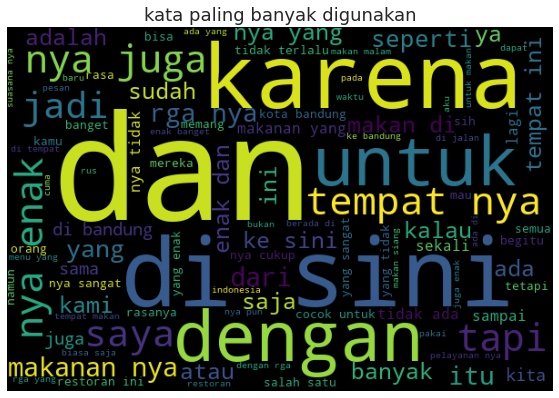

In [ ]:
list_words=''
for sentence in data['sentence']:
    for word in sentence:
        list_words += (word)

# list_words
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Kata paling banyak digunakan', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [ ]:
list_words

'warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung tahu berkualitas dipadu keahlian memasak dipadu kretivitas jadilah warung yang menyajikan menu utama berbahan tahu ditambah menu umum lain seperti ayam semuanya selera indonesia rga cukup terjangkau jangan melewati tahu bletoka nya tidak kalah dengan yang asli dari tegalmohon ulama lurus dan k mmbri hujjah partai apa yang rus diwlh agar suara islam tidak pecah pecahlokasi strategis di jalan sumatra bandung tempat nya nyaman terutama sofa di lantai paella nya enak sangat pas dimakan dengan minum bir dingin appetiser nya juga enak enakbetapa bahagia nya diri ini saat unboxing paket dan barang nya bagus menetapkan beli lagiaduh jadi mahasiswa jangan sombong dong kasih kartu kuning segala belajar dulu yang baik tidak usahlah ikut ikut politik nanti sudah selesai kuliah nya mau ikut politik juga tidak telat dasar mahasiswamakanan beragam rga makanan di food stall akan ditambahkan 

In [31]:
data = pd.read_csv('train_preprocess1.csv')
sentences = data['sentence']
sentences

0        warung ini dimiliki oleh pengusaha pabrik tahu...
1        mohon ulama lurus dan k mmbri hujjah partai ap...
2        lokasi strategis di jalan sumatra bandung temp...
3        betapa bahagia nya diri ini saat unboxing pake...
4        aduh jadi mahasiswa jangan sombong dong kasih ...
                               ...                        
10992                                         tidak kecewa
10993    enak rasa masakan nya apalagi kepiting yang me...
10994          hormati partai partai yang telah berkoalisi
10995    pagi pagi di tol pasteur sudah macet parah bik...
10996    meskipun sering belanja ke yogyakarta di riau ...
Name: sentence, Length: 10997, dtype: object

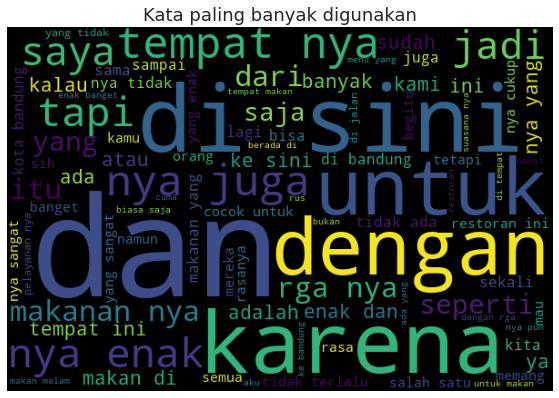

In [ ]:
from wordcloud import STOPWORDS

datasw = pd.read_csv('stopwordID.csv')
custom_stopwords = ['di', 'sini', ]

for sw in custom_stopwords:
    datasw.add(sw);

wordcloud = WordCloud(stopwords=datasw, width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Kata paling banyak digunakan', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [32]:
data2 = pd.read_csv('kata_sifat.csv')
adj = data2['word']
adj

0           abadi
1       abaktinal
2           abang
3        abjadiah
4        abnormal
          ...    
3591      zakelek
3592       zakiah
3593        zalir
3594      zig-zag
3595      zimotik
Name: word, Length: 3596, dtype: object

In [33]:
count_word = {}
sentences = sentences.str.split(" ")

# print(sentences)

for sw in sentences:
  for i in sw:
    for sw2 in adj:
      if(i == sw2):
        count = count_word.get(i, 0)
        count += 1
        count_word[sw2] = count

In [34]:
print(count_word)

{'putih': 73, 'utama': 117, 'lain': 650, 'lurus': 6, 'strategis': 186, 'nyaman': 932, 'bahagia': 19, 'sombong': 22, 'telat': 15, 'untung': 49, 'besar': 472, 'unik': 312, 'ramah': 423, 'bersih': 225, 'luas': 338, 'standar': 259, 'bingung': 67, 'cepat': 334, 'khusus': 115, 'sulit': 92, 'becus': 25, 'bukan': 277, 'puas': 120, 'sepakat': 6, 'lebih': 792, 'sejuk': 265, 'lengkap': 161, 'cocok': 632, 'sedap': 49, 'bagi': 272, 'benar': 454, 'murah': 444, 'ribut': 11, 'setimpal': 38, 'kesal': 82, 'arah': 68, 'macet': 124, 'natural': 15, 'kamil': 52, 'malu': 43, 'siang': 369, 'asyik': 204, 'khas': 459, 'adem': 52, 'tradisional': 125, 'stabil': 7, 'asam': 52, 'terenak': 30, 'amis': 20, 'kalap': 5, 'kampung': 202, 'dekat': 290, 'resi': 13, 'gampang': 33, 'jarang': 41, 'spesial': 139, 'sosial': 28, 'pasti': 316, 'gratis': 67, 'kecewa': 186, 'afdal': 4, 'mantap': 377, 'mesum': 8, 'sungguh': 85, 'miris': 4, 'variatif': 86, 'lokal': 62, 'pantas': 57, 'maju': 31, 'jelas': 100, 'gaya': 56, 'top': 116, '

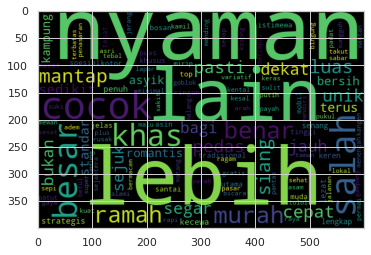

In [36]:
wc = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate_from_frequencies(count_word)
plt.imshow(wc)

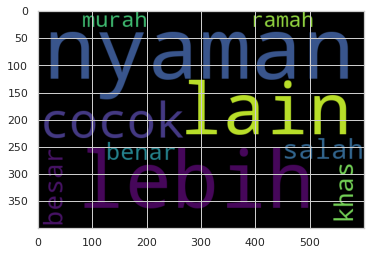

In [38]:
wc = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10, max_words=10, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(count_word)
plt.imshow(wc)

In [87]:
count_word = {}
sen1 = 'Hello world a b c b h a b world b h b h'
sen2 = 'udin'
split_sentence1 = sen1.split(' ')
split_sentence2 = sen2.split(' ')

# for i in split_sentence1:
#     x = split_sentence1.count(i)
#     count_word.append((i,x))

# for sw in split_sentence1:
#   for sw2 in split_sentence2:
    # print(sw+' '+sw2)
    
    # if(sw == sw2):
    #   count_word[sw2] += 1
    # else:
    #   count_word[sw2] = 1
  
for sw in split_sentence1:
  for sw2 in split_sentence2:
    if(sw == sw2):
      count = count_word.get(sw, 0)
      count += 1
      count_word[sw2] = count


print(count_word)

{}


In [17]:
dummy = pd.read_csv('train_preprocess1.csv', nrows=5)
damn = dummy['sentence']
damn
# damn = ['warung', 'ini','ini', 'dimiliki', 'oleh', 'pengusaha', 'pabrik', 'tahu', 'yang', 'sudah', 'puluhan', 'tahun', 'terkenal', 'membuat', 'tahu', 'putih', 'di', 'bandung', 'tahu', 'berkualitas', 'dipadu', 'keahlian', 'memasak', 'dipadu', 'kretivitas', 'jadilah', 'warung', 'yang', 'menyajikan', 'menu', 'utama', 'berbahan', 'tahu', 'ditambah', 'menu', 'umum', 'lain', 'seperti', 'ayam', 'semuanya', 'selera', 'indonesia', 'rga', 'cukup', 'terjangkau', 'jangan', 'melewati', 'tahu', 'bletoka', 'nya', 'tidak', 'kalah', 'dengan', 'yang', 'asli', 'dari', 'tegal']
adj = ['ini', 'lokasi']

count_word = {}
damn = damn.str.split(" ")

print(damn)
for sw in damn:
  for i in sw:
    for sw2 in adj:
      if(i == sw2):
        count = count_word.get(i, 0)
        count += 1
        count_word[sw2] = count

# for sw in damn:
#   for sw2 in adj:
#     print(sw)
#     print(sw2)
#     if(sw == sw2):
#       count = count_word.get(sw, 0)
#       count += 1
#       count_word[sw2] = count

print(count_word)

0    [warung, ini, dimiliki, oleh, pengusaha, pabri...
1    [mohon, ulama, lurus, dan, k, mmbri, hujjah, p...
2    [lokasi, strategis, di, jalan, sumatra, bandun...
3    [betapa, bahagia, nya, diri, ini, saat, unboxi...
4    [aduh, jadi, mahasiswa, jangan, sombong, dong,...
Name: sentence, dtype: object
{'ini': 2, 'lokasi': 1}


In [ ]:
data = pd.read_csv('train_preprocess1.csv')
sentences = data['sentence']

In [26]:
def calculate_frequencies(sentences):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    data = pd.read_csv('train_preprocess1.csv')
    sentences = data['sentence']
    
    # LEARNER CODE START HERE
    clean_content = ""
    count_word = {}
    
    clean_content = sentences

    for sw in sentences:
      for i in sw:
        for sw2 in adj:
          if(i == sw2):
            count = count_word.get(i, 0)
            count += 1
            count_word[sw2] = count
    
    print(count_word)
#     print(sentences)
#     return clean_content
        

calculate_frequencies(sentences)

{}


In [ ]:
myimage = calculate_frequencies(sentences)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()